In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
metrics = pd.read_csv('models/metrics.csv')
winrates = pd.read_csv('models/winrates.csv')
# decays = pd.read_csv('models/decays.csv', names=['decays'])

In [79]:
rewards_rl = pd.read_csv('rewards_rl.csv', names=['reward'])
rewards_opp = pd.read_csv('rewards_opp.csv', names=['reward'])

In [80]:
metrics.shape, winrates.shape

((81, 7), (5, 3))

In [81]:
metrics.tail()

,episode,n_agents,value_loss_avg,value_loss_median,action_loss_avg,action_loss_median,reward_avg
76,76,1,0.004847,0.004847,0.000085,0.000085,0.188159
77,77,1,0.005142,0.005142,0.000092,0.000092,0.202443
78,78,1,0.004781,0.004781,0.000115,0.000115,0.218700
79,79,1,0.004513,0.004513,0.000080,0.000080,0.201418
80,80,1,0.003384,0.003384,0.000129,0.000129,0.189916


In [82]:
winrates.tail() 

,episode,vs_random,vs_fixed
0,0,90.0,0.0
1,20,100.0,0.0
2,40,100.0,0.0
3,60,100.0,10.0
4,80,100.0,20.0


In [83]:
rewards_rl_no_dubs = rewards_rl.drop_duplicates()
rewards_opp_no_dubs = rewards_opp.drop_duplicates()
rewards_rl.shape, rewards_opp.shape, rewards_rl_no_dubs.shape, rewards_opp_no_dubs.shape

((256, 1), (222, 1), (57, 1), (62, 1))

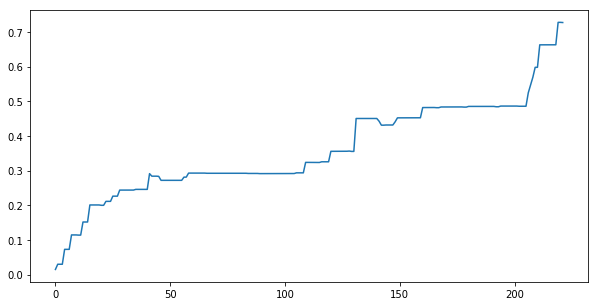

In [84]:
plt.figure(figsize=(10,5))
plt.plot(rewards_opp.index, rewards_opp.reward)
plt.show()

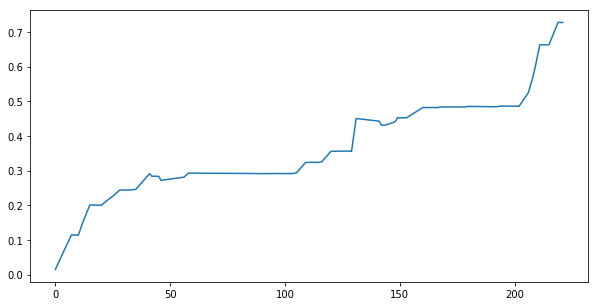

In [85]:
plt.figure(figsize=(10,5))
plt.plot(rewards_opp_no_dubs.index, rewards_opp_no_dubs.reward)
plt.show()

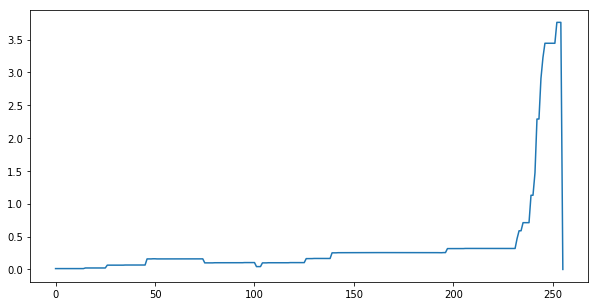

In [86]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl.index, rewards_rl.reward)
plt.show()

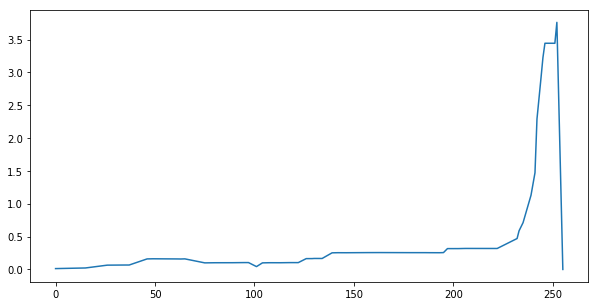

In [87]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl_no_dubs.index, rewards_rl_no_dubs.reward)
plt.show()

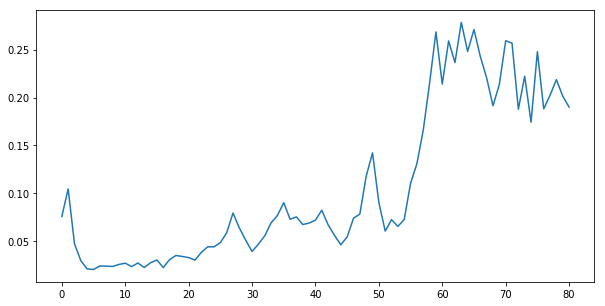

In [89]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.reward_avg)
plt.show()

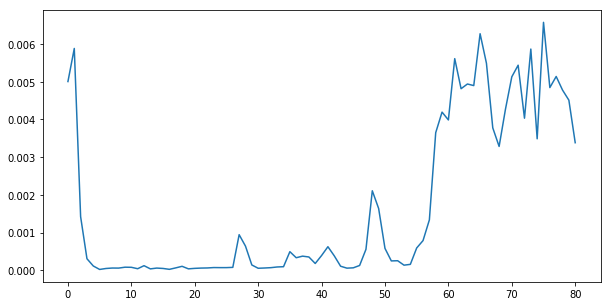

In [90]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.value_loss_avg)
plt.show()

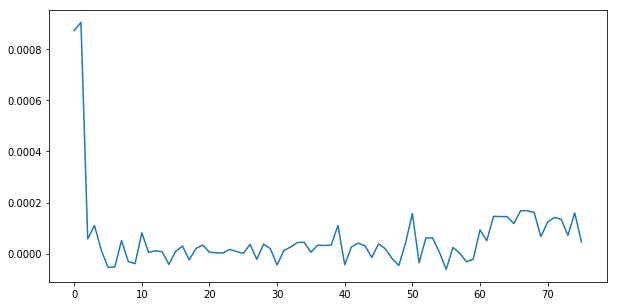

In [74]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.action_loss_avg)
plt.show()

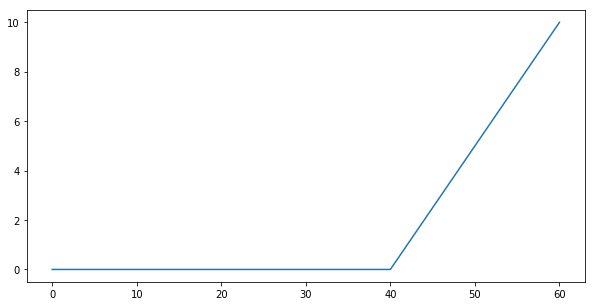

In [75]:
plt.figure(figsize=(10,5))
plt.plot(winrates.episode, winrates.vs_fixed)
plt.show()

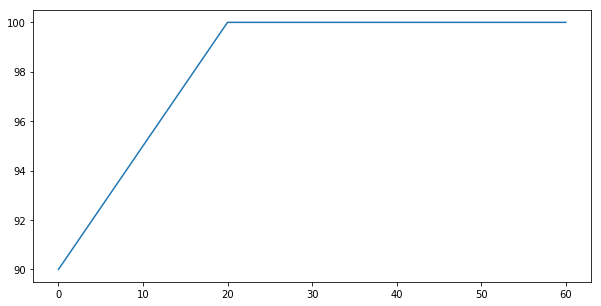

In [76]:
plt.figure(figsize=(10,5))
plt.plot(winrates.episode, winrates.vs_random)
plt.show()